In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import hvplot.pandas
from scipy.stats import linregress
import json

In [2]:
file_path = "../Resources/VAERSDATA1 (3).csv"
covid_df = pd.read_csv(file_path)
covid_df.sample(20)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,VAX_MANU,HISTORY,ALLERGIES
206527,1138928,3/26/2021,OH,34,F,NaN,NaN,N,3/25/2021,3/25/2021,0.0,PHM,PFIZER\BIONTECH,"Rheumatoid arthritis, fibromyalgia, immune thr...","Tylenol, sulfa"
341133,1053891,2/25/2021,IL,44,F,NaN,NaN,N,2/15/2021,2/15/2021,0.0,SCH,MODERNA,NaN,Penicillin Ceclor
200774,2034480,1/14/2022,CA,33,M,NaN,NaN,N,1/11/2022,1/13/2022,2.0,PHM,PFIZER\BIONTECH,NaN,NaN
815476,2074627,1/29/2022,NaN,77,M,NaN,NaN,NaN,3/6/2021,12/21/2021,290.0,UNK,MODERNA,NaN,NaN
722823,975070,1/26/2021,GA,70,F,NaN,NaN,N,1/16/2021,1/24/2021,8.0,PVT,MODERNA,Sleep Apnea,"clindamycin, Novocain, penicillins, Sulfa Drugs"
202190,2452221,9/20/2022,CA,33,F,NaN,NaN,Y,9/13/2022,9/14/2022,1.0,PHM,MODERNA,NaN,NaN
812070,1269355,4/28/2021,NY,77,M,NaN,NaN,Y,2/18/2021,2/18/2021,0.0,PVT,PFIZER\BIONTECH,Medical History/Concurrent Conditions: Tumour,NaN
430402,2104119,2/11/2022,CA,50,U,NaN,NaN,Y,11/22/2021,11/22/2021,0.0,UNK,MODERNA,NaN,NaN
347334,1760004,10/4/2021,GA,44,F,NaN,NaN,N,10/1/2021,10/2/2021,1.0,PHM,PFIZER\BIONTECH,Asthma High blood pressure Heart disease,Latex Iodine Bupropion Shrimp
342959,1214585,4/15/2021,PA,44,F,NaN,NaN,N,4/14/2021,4/14/2021,0.0,PHM,MODERNA,Hbp Fibromyalgia,Cipro Clindamycin Later Metal


In [3]:
covid_df.drop(['NUMDAYS', 'V_ADMINBY', 'HISTORY', 'ALLERGIES'], axis=1, inplace=True)

covid_df.head()


,VAERS_ID,RECVDATE,STATE,AGE_YRS,SEX,DIED,DATEDIED,RECOVD,VAX_DATE,ONSET_DATE,VAX_MANU
0,1021156,2/10/2021,IL,32,F,NaN,NaN,N,1/27/2021,2/4/2021,MODERNA
1,1029567,2/14/2021,NH,61,M,NaN,NaN,U,2/14/2021,2/14/2021,MODERNA
2,1061353,2/28/2021,WA,74,M,NaN,NaN,N,2/24/2021,2/24/2021,PFIZER\BIONTECH
3,1066793,3/2/2021,AZ,81,M,NaN,NaN,N,2/12/2021,2/26/2021,PFIZER\BIONTECH
4,1219181,4/16/2021,TX,15,M,NaN,NaN,Y,4/15/2021,4/15/2021,PFIZER\BIONTECH


In [4]:
#total count of vaccines administered by manufacturer
vaccine_counts = covid_df.groupby('VAX_MANU').size().reset_index(name='Total_Vaccines_Administered')

vaccine_counts



,VAX_MANU,Total_Vaccines_Administered
0,JANSSEN,53687
1,MODERNA,408657
2,NOVAVAX,300
3,PFIZER\BIONTECH,413910
4,UNKNOWN MANUFACTURER,19975


In [5]:
# Adverse Reactions
adverse_reactions_df = covid_df[(covid_df['RECOVD'] != 'Y')]

# Seperate deaths
deaths_df = covid_df[(covid_df['DIED'] == 'Y')]

# Group by manufacturer for adverse reactions
adverse_reactions_by_manufacturer = adverse_reactions_df.groupby('VAX_MANU').size().reset_index(name='Adverse_Reactions')

# Group by manufacturer for deaths
deaths_by_manufacturer = deaths_df.groupby('VAX_MANU').size().reset_index(name='Deaths')

# Merge both summaries
summary_df = adverse_reactions_by_manufacturer.merge(deaths_by_manufacturer, on='VAX_MANU', how='outer').fillna(0)

# Print
summary_df



,VAX_MANU,Adverse_Reactions,Deaths
0,JANSSEN,35521,1317.0
1,MODERNA,268139,7563.0
2,NOVAVAX,218,0.0
3,PFIZER\BIONTECH,287050,7403.0
4,UNKNOWN MANUFACTURER,13543,623.0


In [6]:
#adverse reaction %
adverse_percentage_df = vaccine_counts.merge(adverse_reactions_by_manufacturer, on='VAX_MANU', how='left').fillna(0)

adverse_percentage_df['Adverse_Reaction_Percentage'] = (adverse_percentage_df['Adverse_Reactions'] / adverse_percentage_df['Total_Vaccines_Administered']) * 100

adverse_percentage_df

,VAX_MANU,Total_Vaccines_Administered,Adverse_Reactions,Adverse_Reaction_Percentage
0,JANSSEN,53687,35521,66.163131
1,MODERNA,408657,268139,65.614684
2,NOVAVAX,300,218,72.666667
3,PFIZER\BIONTECH,413910,287050,69.350825
4,UNKNOWN MANUFACTURER,19975,13543,67.799750


In [7]:
#death % by manufacturer

death_percentage_df = vaccine_counts.merge(deaths_by_manufacturer, on="VAX_MANU", how='left').fillna(0)

death_percentage_df['Deaths'] = death_percentage_df['Deaths'].astype(int)

death_percentage_df['Death_Percentage'] = (death_percentage_df['Deaths'] / death_percentage_df['Total_Vaccines_Administered']) * 100

death_percentage_df




,VAX_MANU,Total_Vaccines_Administered,Deaths,Death_Percentage
0,JANSSEN,53687,1317,2.453108
1,MODERNA,408657,7563,1.850696
2,NOVAVAX,300,0,0.000000
3,PFIZER\BIONTECH,413910,7403,1.788553
4,UNKNOWN MANUFACTURER,19975,623,3.118899


<function matplotlib.pyplot.show(close=None, block=None)>

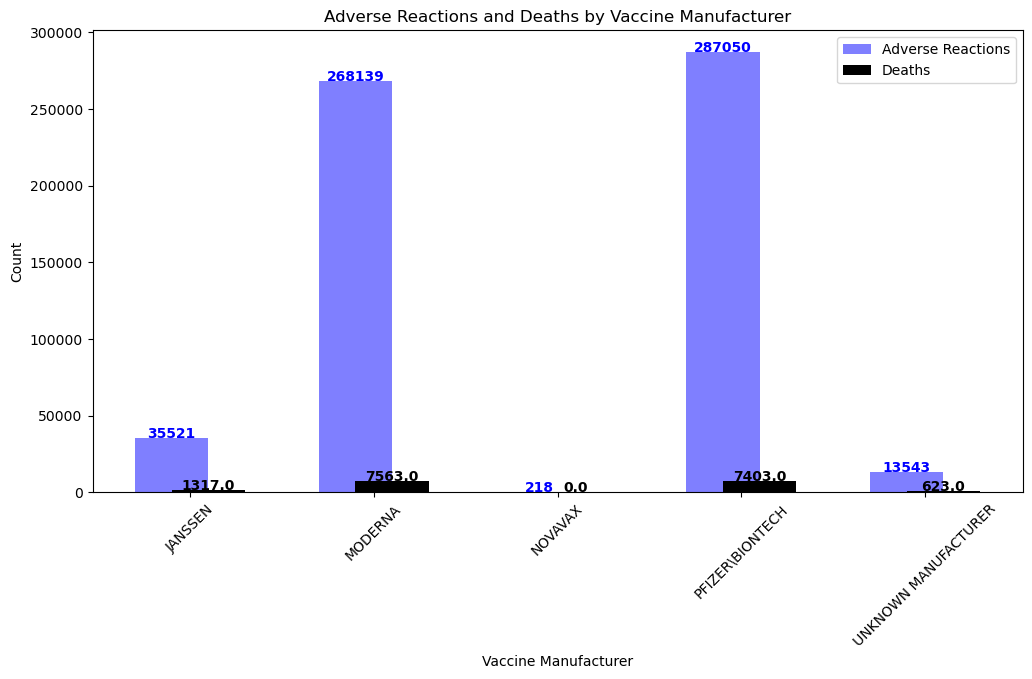

In [17]:
y1 = summary_df["Adverse_Reactions"]
y2 = summary_df["Deaths"]
x_labels = summary_df["VAX_MANU"]
x = np.arange(len(x_labels))

plt.figure(figsize=(12,6))
plt.bar(x -0.1, y1, color='blue', width=0.4, alpha=0.5, align='center', label="Adverse Reactions")
plt.bar(x +0.1, y2, color='black', width=0.4, alpha=1, align='center', label="Deaths")

# Add totals above bars
for i in range(len(x)):
    plt.text(x[i] - 0.1, y1.iloc[i] + 5, str(y1.iloc[i]), ha='center', fontsize=10, fontweight='bold', color='blue')
    plt.text(x[i] + 0.1, y2.iloc[i] + 5, str(y2.iloc[i]), ha='center', fontsize=10, fontweight='bold', color='black')

plt.xticks(ticks=x, labels=x_labels, rotation=45)
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Count")
plt.title("Adverse Reactions and Deaths by Vaccine Manufacturer")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

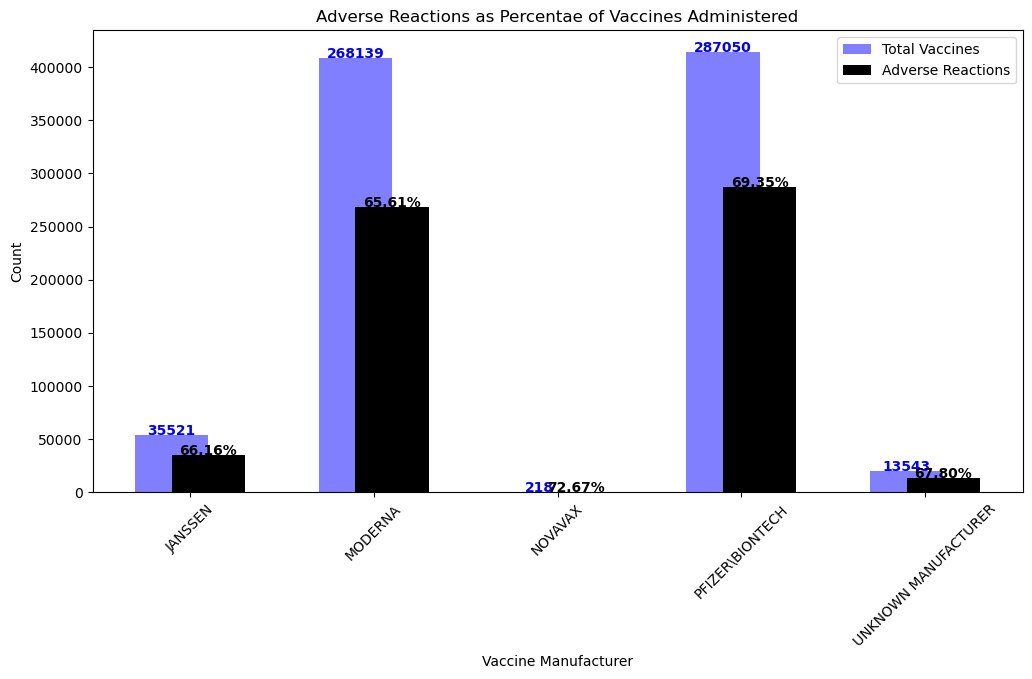

In [ ]:
y1 = adverse_percentage_df["Total_Vaccines_Administered"]
y2 = adverse_percentage_df["Adverse_Reactions"]
y3 = adverse_percentage_df["Adverse_Reaction_Percentage"]
x_labels = summary_df["VAX_MANU"]
x = np.arange(len(x_labels))

plt.figure(figsize=(12,6))
plt.bar(x -0.1, y1, color='blue', width=0.4, alpha=0.5, align='center', label="Total Vaccines")
plt.bar(x +0.1, y2, color='black', width=0.4, alpha=1, align='center', label="Adverse Reactions")

# Add totals above bars
for i in range(len(x)):
    plt.text(x[i] - 0.1, y1.iloc[i] + 5, str(y2.iloc[i]), ha='center', fontsize=10, fontweight='bold', color='blue')
    plt.text(x[i] + 0.1, y2.iloc[i] + 5, f"{y3.iloc[i]:.2f}%", ha='center', fontsize=10, fontweight='bold', color='black')

plt.xticks(ticks=x, labels=x_labels, rotation=45)
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Count")
plt.title("Adverse Reactions as Percentage of Vaccines Administered")
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

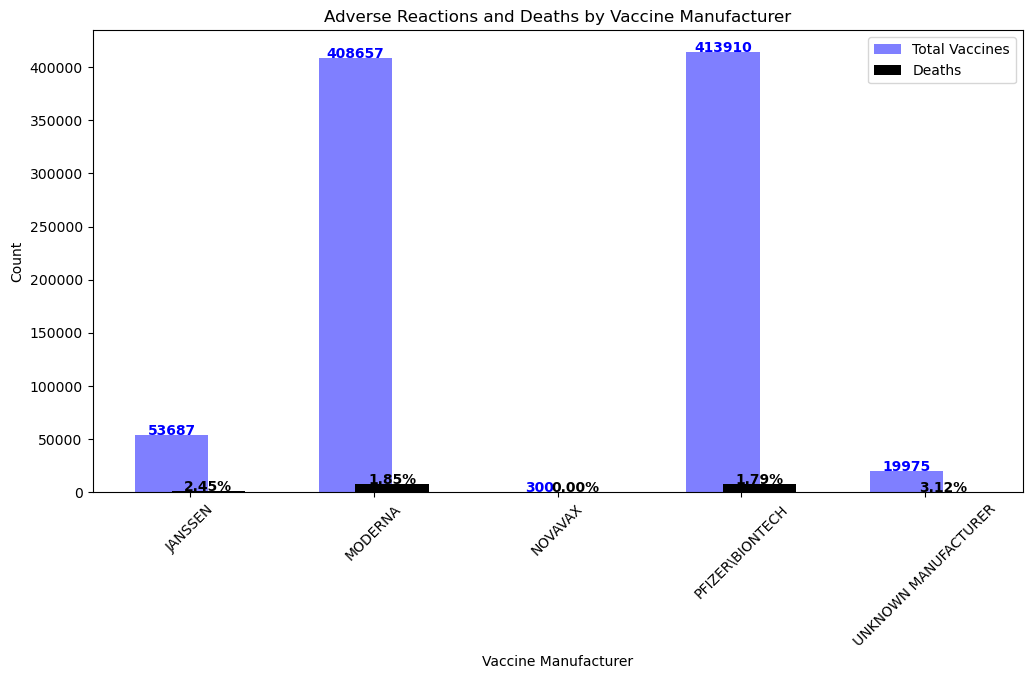

In [ ]:
y1 = death_percentage_df["Total_Vaccines_Administered"]
y2 = death_percentage_df["Deaths"]
y3 = death_percentage_df["Death_Percentage"]
x_labels = summary_df["VAX_MANU"]
x = np.arange(len(x_labels))

plt.figure(figsize=(12,6))
plt.bar(x -0.1, y1, color='blue', width=0.4, alpha=0.5, align='center', label="Total Vaccines")
plt.bar(x +0.1, y2, color='black', width=0.4, alpha=1, label="Deaths")

# Add totals above bars
for i in range(len(x)):
    plt.text(x[i] - 0.1, y1.iloc[i] + 5, str(y1.iloc[i]), ha='center', fontsize=10, fontweight='bold', color='blue')
    plt.text(x[i] + 0.1, y2.iloc[i] + 5, f"{y3.iloc[i]:.2f}%", ha='center', fontsize=10, fontweight='bold', color='black')

plt.xticks(ticks=x, labels=x_labels, rotation=45)
plt.xlabel("Vaccine Manufacturer")
plt.ylabel("Count")
plt.title("Deaths by Vaccine Manufacturer")
plt.legend()
plt.show